# Lab 2: Mine Crafting
**Name: Siyona Arndt**

**Date: 03/28/2025**

# Part 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
# Problem 1

# v^2 = sqrt((2 * d)/(a)) where a in this case is negative g0, and d is the distance the object falls

def t1(d, a):
    t = np.sqrt((2 * d) / (- a))
    return t

g0 = 9.81 # m/s/s
xf = 0 # m
xi = 4e3 # m 
d = xf - xi # m
t1 = t1(d, g0)
print('The rough time it will take the object to fall 4km is:', t1, 'seconds')

The rough time it will take the object to fall 4km is: 28.55686245854129 seconds


In [5]:
# Problem 2 

# v = dy/dt thus the derivative of v, dv/dt, is d^2y/dt^2
def dydt1(t, s):
    y, v = s
    dydt = v
    dvdt = -g + alpha * (np.abs(v))**gamma
    return [dydt, dvdt]


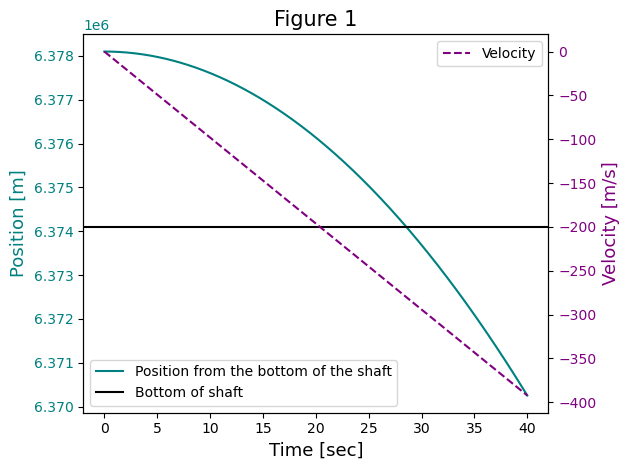

In [6]:
# Problem 3 

# constants
g = g0
alpha = 0
gamma = 0
R = 6378.1e3 # meters
x_final1 = R - 4e3 # surface of the earth minus the mine shaft distance

# Time span:
t0_13 = 0 # seconds 
tf_13 = 40 # seconds
t_eval_13 = np.linspace(t0_13, tf_13, 1000)

# initial conditions
y0_13 = [R, 0] # initial position at the surface of the earth, inital velocity is 0 m/s, 
#msetting the center of the earth to be a position 0 km 

# solve
soln_13 = solve_ivp(fun = dydt1, t_span = (t0_13, tf_13), y0 = y0_13, t_eval = t_eval_13)

# define position and velocity 
position_13 = soln_13.y[0]
velocity_13 = soln_13.y[1]

# graph
fig1, ax1 = plt.subplots()
ax1.plot(t_eval_13, position_13, '-', color = 'teal', label = 'Position from the bottom of the shaft')
ax11 = ax1.twinx()
ax11.plot(t_eval_13, velocity_13, '--', color = 'purple', label = 'Velocity')
ax1.axhline(x_final1, 0, color = 'black', label = 'Bottom of shaft')
ax1.set_xlabel('Time [sec]', size = 13)
ax1.set_ylabel('Position [m]', color = 'teal', size = 13)
ax11.set_ylabel('Velocity [m/s]', color = 'purple', size = 13)
ax1.tick_params(axis = 'y', labelcolor = 'teal')
ax11.tick_params(axis = 'y', labelcolor = 'purple')
ax1.legend(loc = 'lower left')
ax11.legend()
ax1.set_title('Figure 1', size = 15)
fig1.tight_layout()

In [7]:
# Problem 4

# when the position - (R - 4 km) is 0, the object will have hit the mineshaft, assuming 
def stopping1(t, s):
    return s[0] - x_final1

# solve
soln_14 = solve_ivp(fun = dydt1, t_span = (t0_13, tf_13), y0 = y0_13, t_eval = t_eval_13, events = stopping1)

stopping_time = soln_14.t_events[0][0]
print('The mass hits the bottom of the shaft, with no drag, at', stopping_time, 'seconds')

The mass hits the bottom of the shaft, with no drag, at 28.556862458540376 seconds


**Problem 4 continued:** Both the analytic and numeric solution are the same up to 13 decimal places. They both report the stopping time to be 28.56 seconds. Therefore there isn't much difference in the time. The difference after the 13th decimal point could be due to the fact that solve_ivp has to calculate everything numerically not sybolically.

# Part 2

With height dependent gravity and no drag, mass hits the bottom of the shaft after 28.558355124289452 seconds


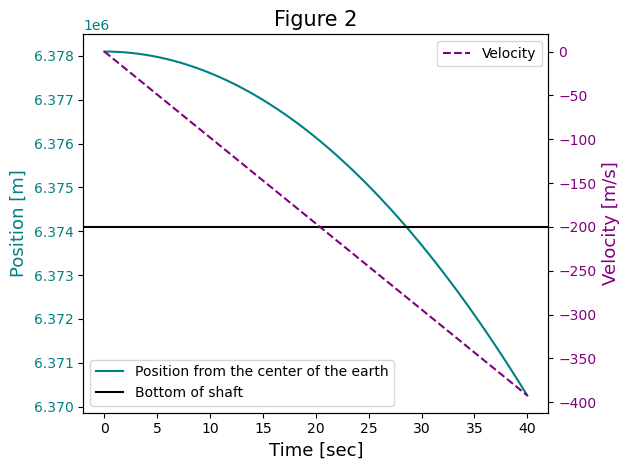

In [10]:
# Problem 1 

# define a function for height dependent gravity
def g2(r, R):
    return g0 * (r/R)

# Define a system of differential equations using the variable gravity for the for force and velocity
def dydt2(t, s):
    y, v = s
    dydt = v
    dvdt = -g2(s[0], R) + alpha * (np.abs(s[1]))**gamma
    return [dydt, dvdt]

# constants 
R = 6378.1e3 # meters
alpha = 0
gamma = 0
positionf_21 = R - 4e3 # bottom of the shaft

# Time span 
t0_21 = 0 # seconds
tf_21 = 40 # seconds
t_eval_21 = np.linspace(t0_21, tf_21, 1000)

# Initial conditions
position0_21 = R # m
velocity0_21 = 0 # m/s 
y0_21 = [position0_21, velocity0_21]

# solve
soln_21 = solve_ivp(fun = dydt2, t_span = (t0_21, tf_21), y0 = y0_21, t_eval = t_eval_21)

# Define position and velocity
position_21 = soln_21.y[0]
velocity_21 = soln_21.y[1]

# Graph
fig2, ax2 = plt.subplots()
ax2.plot(t_eval_21, position_21, '-', color = 'teal', label = 'Position from the center of the earth')
ax22 = ax2.twinx()
ax22.plot(t_eval_13, velocity_21, '--', color = 'purple', label = 'Velocity')
ax2.axhline(positionf_21, 0, color = 'black', label = 'Bottom of shaft')
ax2.set_xlabel('Time [sec]', size = 13)
ax2.set_ylabel('Position [m]', color = 'teal', size = 13)
ax22.set_ylabel('Velocity [m/s]', color = 'purple', size = 13)
ax2.tick_params(axis = 'y', labelcolor = 'teal')
ax22.tick_params(axis = 'y', labelcolor = 'purple')
ax2.legend(loc = 'lower left')
ax22.legend()
ax2.set_title('Figure 2', size = 15)
fig2.tight_layout()

# Define when the object reaches the bottm of the shaft
def stopping2(t, s):
    return s[0] - positionf_21

# solve
soln_221 = solve_ivp(fun = dydt2, t_span = (t0_21, tf_21), y0 = y0_21, t_eval = t_eval_21, events = stopping2)

stopping_time_21 = soln_221.t_events[0][0]
print('With height dependent gravity and no drag, mass hits the bottom of the shaft after', stopping_time_21, 'seconds')

**Problem 2:** Incorperating a height dependent g makes the fall time increase by a small amount. The increase is in the third decimal place. Without the variable g the fall time is 28.55686 seconds and with the variable g, the fall time is 28.55836 seconds. Thus there is not much of a change, however there is a small increase in the time because as the object falls further into the earth there is less mass below it thus the force due to gravity gets less.

With drag and height dependent gravity, the mass hits the bottom of the shaft in 84.27864638129618 seconds


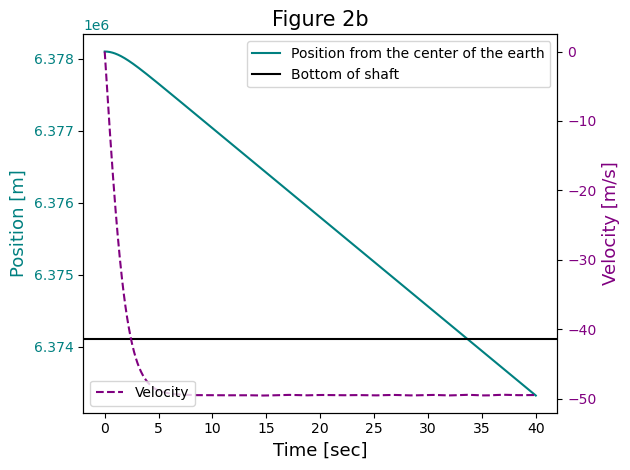

In [12]:
# Problem 3

# constants, this time with drag on
# alpha was found by playing around with its value until the graph 
# shows a terminal speed (an approximate horizontal line) at -50 m/s
R = 6378.1e3 # meters
alpha = 0.004
gamma = 2
positionf_21 = R - 4e3

# Time span 
t0_23 = 0 # seconds
tf_23 = 100 # seconds
t_eval_23 = np.linspace(t0_23, tf_23, 1000)

# solve
soln_23 = solve_ivp(fun = dydt2, t_span = (t0_23, tf_23), y0 = y0_21, t_eval = t_eval_23)

# Define postion and velocity
position_23 = soln_23.y[0]
velocity_23 = soln_23.y[1]

# Graph 
fig2b, ax2b = plt.subplots()
ax2b.plot(t_eval_21, position_23, '-', color = 'teal', label = 'Position from the center of the earth')
ax22b = ax2b.twinx()
ax22b.plot(t_eval_13, velocity_23, '--', color = 'purple', label = 'Velocity')
ax2b.axhline(positionf_21, 0, color = 'black', label = 'Bottom of shaft')
ax2b.set_xlabel('Time [sec]', size = 13)
ax2b.set_ylabel('Position [m]', color = 'teal', size = 13)
ax22b.set_ylabel('Velocity [m/s]', color = 'purple', size = 13)
ax2b.tick_params(axis = 'y', labelcolor = 'teal')
ax22b.tick_params(axis = 'y', labelcolor = 'purple')
ax2b.legend(loc = 'upper right')
ax22b.legend(loc = 'lower left')
ax2b.set_title('Figure 2b', size = 15)
fig2b.tight_layout()

# Define when the object hits the bottom of the shaft
def stopping2(t, s):
    return s[0] - positionf_21

soln_223 = solve_ivp(fun = dydt2, t_span = (t0_23, tf_23), y0 = y0_21, t_eval = t_eval_23, events = stopping2)

stopping_time_23 = soln_223.t_events[0][0]
print('With drag and height dependent gravity, the mass hits the bottom of the shaft in', stopping_time_23, 'seconds')

**Problem 3 continued:** When including drag, the time it takes for the object to hit the bottom of the shaft drastically increases. Without drag, but still with a height dependent gravity, the time it takes the mass to hit the bottom of the shaft is 28.55836 seconds. However, with drag and with a height dependent gravity the time it takes for the object to hit the bottom of the shaft is 84.27865 seconds. This is a drastic increase from without drag. Thus drag increases the amount of time it takes the object to hit the bottom of the shaft. This makes sense as the drag force opposes the objects motion.

**Part 3**

In [15]:
# Question 1

# define a system of differential equations including the coriolis force, for the force and velocity
# there will be no movement or velocity in the z direction, however I have included it here for compeletness
def derivatives3(t, s):
    x, y, z, vx, vy, vz = s
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = -2 * m * omega * s[4] 
    dvydt = -g2(s[1], R) + alpha * ((np.abs(s[4]))**gamma) + ((-2 * m) * omega * s[3])
    dvzdt = 0
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]

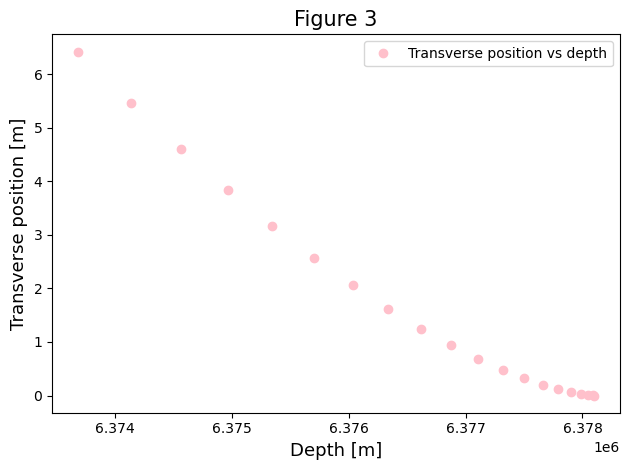

In [16]:
# Question 2

# constants 
# no drag
R = 6378.1e3 # meters
alpha = 0
gamma = 0
positionf_31 = R - 4e3
m = 1 # kg 
omega = 7.272e-5 # rad/s

# Time span 
t0_31 = 0 # seconds
tf_31 = 30 # seconds
t_eval_31 = np.linspace(t0_31, tf_31, 20)

# Initial conditions
position0x_31 = 0 # m
position0y_31 = R # m
position0z_31 = 0 # m
velocity0x_31 = 0 # m/s 
velocity0y_31 = 0 # m/s 
velocity0z_31 = 0 # m/s 
y0_31 = [position0x_31, position0y_31, position0z_31, velocity0x_31, velocity0y_31, velocity0z_31]

# solve
soln_31 = solve_ivp(fun = derivatives3, t_span = (t0_31, tf_31), y0 = y0_31, t_eval = t_eval_31)

# Define the positions and velocities in all directions
positionx_31 = soln_31.y[0]
positiony_31 = soln_31.y[1]
positionz_31 = soln_31.y[2] # always 0
velocityx_31 = soln_31.y[3]
velocityy_31 = soln_31.y[4]
velocityz_31 = soln_31.y[5] # always 0

# Graph
fig3, ax3 = plt.subplots()
ax3.plot(positiony_31, positionx_31, 'o', color = 'pink', label = 'Transverse position vs depth')
ax3.set_xlabel('Depth [m]', size = 13)
ax3.set_ylabel('Transverse position [m]', size = 13)
ax3.set_title('Figure 3', size = 15)
ax3.legend()
fig3.tight_layout()

In [17]:
# Question 3

width = 5 # m
radius = width/2

# define when the object would hit the side of the shaft if the shaft was infinitly long
def stopping3a(t, s):
    return s[0] - radius

stopping3a.terminal = True

# define when the object would hit the bottom of the shaft if the shaft was infinitly wide
def stopping3b(t, s):
    return s[1] - positionf_31

stopping3b.terminal = True

# solve for  when the object would hit the side of the shaft if the shaft was infinitly long
soln_33a = solve_ivp(fun = derivatives3, t_span = (t0_31, tf_31), y0 = y0_31, t_eval = t_eval_31, events = stopping3a)

# solve for  when the object would hit the bottom of the shaft if the shaft was infinitly wide
soln_33b = solve_ivp(fun = derivatives3, t_span = (t0_31, tf_31), y0 = y0_31, t_eval = t_eval_31, events = stopping3b)

stopping_time_33a = soln_33a.t_events[0][0]
stopping_depth33a = R - soln_33a.y[1][-1]
print('Without drag the time the mass would hit the side would be at', stopping_time_33a, 'seconds at a depth of', stopping_depth33a, 'm into the shaft')

stopping_time_33b = soln_33b.t_events[0][0]
print('Without drag the time the mass would hit the bottom would be at', stopping_time_33b, 'seconds')


Without drag the time the mass would hit the side would be at 21.90709540954398 seconds at a depth of 2066.5118167325854 m into the shaft
Without drag the time the mass would hit the bottom would be at 28.55833458094921 seconds


Without drag, the object would hit the side of the wall first. If the shaft was infinitly deep, the mass would hit the wall at 21.91 seconds. If the tunnel was infinitly wide the mass would hit the bottom of the shaft at 28.56 seconds. Since 21.91 seconds is less than 28.56 seconds, the object would hit the wall first before reaching the bottom of the shaft.

In [19]:
# Problem 4

# constants 
# turn drag back on
R = 6378.1e3 # meters
alpha = 0.004
gamma = 2
positionf_31 = R - 4e3
m = 1 # kg 
omega = 7.272e-5 # rad/s

# Time span 
t0_34 = 0 # seconds
tf_34 = 100 # seconds
t_eval_34 = np.linspace(t0_34, tf_34, 50)

# define when the object would hit the side of the shaft if the shaft was infinitly long
def stopping4a(t, s):
    return s[0] - radius

stopping4a.terminal = True

# define when the object would hit the bottom of the shaft if the shaft was infinitly wide
def stopping4b(t, s):
    return s[1] - positionf_31

stopping4b.terminal = True

# solve for  when the object would hit the side of the shaft if the shaft was infinitly long
soln_34a = solve_ivp(fun = derivatives3, t_span = (t0_34, tf_34), y0 = y0_31, t_eval = t_eval_31, events = stopping4a)

# solve for  when the object would hit the bottom of the shaft if the shaft was infinitly wide
soln_34b = solve_ivp(fun = derivatives3, t_span = (t0_34, tf_34), y0 = y0_31, t_eval = t_eval_31, events = stopping4b)

stopping_time_34a = soln_34a.t_events[0][0]
stopping_depth_34a = R - soln_34a.y[1][-1]
print('With drag the time the mass would hit the side would be at', stopping_time_34a, 'seconds at a depth of', stopping_depth_34a, 'm into the shaft')

stopping_time_34b = soln_34b.t_events[0][0]
print('With drag the time the mass would hit the bottom would be at', stopping_time_34b, 'seconds')

With drag the time the mass would hit the side would be at 29.67958590123462 seconds at a depth of 1234.2192587833852 m into the shaft
With drag the time the mass would hit the bottom would be at 84.27753720865664 seconds


With drag the object still hits the side first, just at a slightly later time that without drag. If the shaft was infinitly deep, the mass would hit the wall at 29.68 seconds. If the tunnel was infinitly wide the mass would hit the bottom of the shaft at 84.28 seconds. Since 29.68 seconds is less than 84.28 seconds, the mass would hit the wall first before reaching the bottom of the shaft. Without drag the mass hits the wall at 21.91 seconds and with drag the mass hits the wall at 29.68 seconds. Since 21.91 seconds is less than 29.68 seconds, without drag the mass hits the wall faster than it does with drag, however, in both cases the mass will hit the wall before it reaches the bottom of the shaft.

**Part 4**

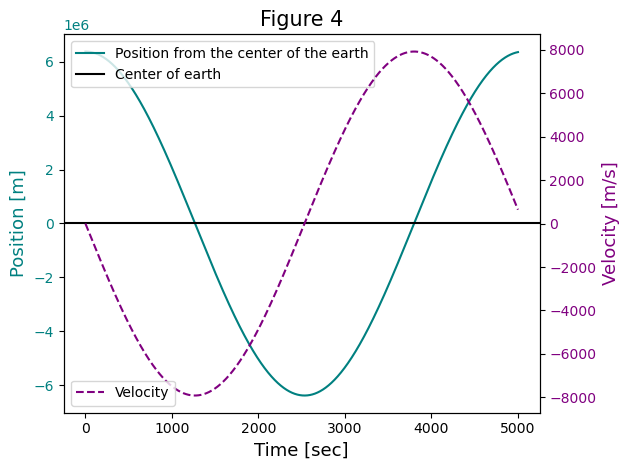

In [22]:
# Question 1

# define a function for variable gravity that works as r becomes negative
# the origional variable g function would still work but this is more clear
def g4(r, R):
    return np.where(r > 0, g0 * (np.abs(r)/R), -g0 * (np.abs(r)/R))
   
# define a system of differental equations with the new variable g, and no coriolis 
# force for force and velocity
def dydt4(t, s):
    y, v = s
    dydt = v
    dvdt = -g4(s[0], R) + alpha * (np.abs(s[1]))**gamma
    return [dydt, dvdt]

# constants 
# no drag
R = 6378.1e3 # meters
alpha = 0
gamma = 0


# Time span 
t0_41 = 0 # seconds
tf_41 = 5000 # seconds
t_eval_41 = np.linspace(t0_41, tf_41, 10000)

# Initial conditions
position0_41 = R # m
velocity0_41 = 0 # m/s 
y0_41 = [position0_41, velocity0_41]

# solve
soln_41 = solve_ivp(fun = dydt4, t_span = (t0_41, tf_41), y0 = y0_41, t_eval = t_eval_41)

# Define the position and velocity
position_41 = soln_41.y[0]
velocity_41 = soln_41.y[1]

# Graph
fig4, ax4 = plt.subplots()
ax4.plot(t_eval_41, position_41, '-', color = 'teal', label = 'Position from the center of the earth')
ax44 = ax4.twinx()
ax44.plot(t_eval_41, velocity_41, '--', color = 'purple', label = 'Velocity')
ax4.axhline(0, 0, color = 'black', label = 'Center of earth')
ax4.set_xlabel('Time [sec]', size = 13)
ax4.set_ylabel('Position [m]', color = 'teal', size = 13)
ax44.set_ylabel('Velocity [m/s]', color = 'purple', size = 13)
ax4.tick_params(axis = 'y', labelcolor = 'teal')
ax44.tick_params(axis = 'y', labelcolor = 'purple')
ax4.legend(loc = 'upper left')
ax44.legend(loc = 'lower left')
ax4.set_title('Figure 4', size = 15)
fig4.tight_layout()

The mass travels from the surface of the earth to the center and then through the center and out to the opposite surface of the earth, but not quite reaching it. It speeds up as it falls to the ceter of the earth traveling down, then as it continues traveling down past the center of the earth it starts loosing its negative velocity until it has no velocity when it just about reaches the opposite surface of the earth. Then it starts gaining speed but in the other direction until it again reaches the center of the earth. Finally, while still traveling back to the other side it starts loosing speed, until it reaches 0 velocity just around the surface of the earth, however the mass never fully returns to where it started. This cycle will keep repeating. 

In [24]:
# Problem 2

# Object reaches the other side 
def other_side42(t, s):
    return s[0] - (-R * 0.999) # doesn't reach the other side exactly, so I try and get very close

# Solve
soln_42a = solve_ivp(fun = dydt4, t_span = (t0_41, tf_41), y0 = y0_41, t_eval = t_eval_41, events = other_side42, rtol = 1e-9)

reaches_other_side42 = soln_42a.t_events[0][0]
print('The time the mass would get to the other side of the earth is', reaches_other_side42, 'seconds')

# Object reaches the center
def center42(t, s):
    return s[0]

# Set solve_ivp to stop solving when the object reaches the center of the earth
center42.terminal = True

# solve
soln_42b = solve_ivp(fun = dydt4, t_span = (t0_41, tf_41), y0 = y0_41, t_eval = t_eval_41, events = center42, rtol = 1e-9)

# Define the velocity, the position when the object reaches the center of 
# the earth, and the velocity when the object reaches the earth
velocity42b = soln_42b.y[1]
reaches_center42 = soln_42b.t_events[0][0]
center_velocity = velocity42b[-1]

print('The time the mass would reach the center of the earth at', reaches_center42, 'seconds')
print('The mass will be traveling at', center_velocity, 'm/s when it reaches the center of the earth')

The time the mass would get to the other side of the earth is 2497.0876881598565 seconds
The time the mass would reach the center of the earth at 1266.5753611491434 seconds
The mass will be traveling at -7910.065840004016 m/s when it reaches the center of the earth


In [25]:
# Problem 3

# define the crossing time 
def Crossing_time(t, s):
    return s[0] - (0.99 * R)

# solve
soln_43 = solve_ivp(fun = dydt4, t_span = (t0_41, tf_41), y0 = y0_41, t_eval = t_eval_41, events = Crossing_time, rtol = 1e-9)

Crossing = soln_43.t_events[0][1]
print('The object reaches again the side where it starts (the crossing time) at about', Crossing, 'seconds')

# constants
G = 6.6743e-11 # M^3/kg/s^2
M = 5.972e24 # kg

# Solving for the orbital velocity 
velocity43 = np.sqrt((G * M)/R)
print('The orbital velocity is', velocity43, 'm/s')

# Find the orbital period
distance = 2 * np.pi * R
period = distance / velocity43
print('The orbital period is:', period, 'seconds')

# Find the difference between the crossing time and the orbital period 
difference = period - Crossing
print('The difference between the oribital period and the crossing time is', difference, 'seconds')

The object reaches again the side where it starts (the crossing time) at about 4952.174362010731 seconds
The orbital velocity is 7905.277129890415 m/s
The orbital period is: 5069.371199675785 seconds
The difference between the oribital period and the crossing time is 117.19683766505386 seconds


The crossing time and the orbital period are about the same. The crossing time is about 4952.17 seconds, and the orbital period is about 5069.37 seconds. This is only a difference of about 117.2 seconds. Thus they are roughly the same. The difference could come from the fact that the object isn't reaching the exact surface of the earth again after it falls from its initial position. Thus the crossing time is slightly less than the orbital time.

**Part 5**

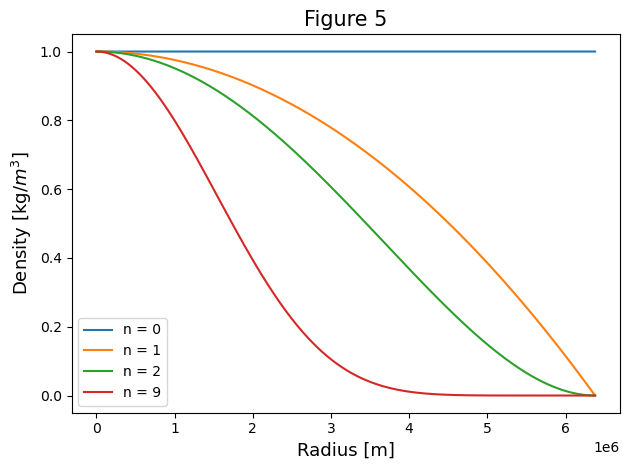

In [28]:
# Question 1

from scipy.integrate import quad

# define a function for density 
def density(r, n):
    p_n = 1
    return p_n * (1 - (r**2)/(R**2))**n

# define an array of radii values to evaluate at
rs = np.linspace(0, R, 10000)

# with normalized density the density values for values of n
p0 = density(rs, 0)
p1 = density(rs, 1)
p2 = density(rs, 2)
p9 = density(rs, 9)

# graph
fig5, ax5 = plt.subplots()
ax5.plot(rs, p0, '-', label = 'n = 0')
ax5.plot(rs, p1, '-', label = 'n = 1')
ax5.plot(rs, p2, '-', label = 'n = 2')
ax5.plot(rs, p9, '-', label = 'n = 9')
ax5.set_xlabel('Radius [m]', size = 13)
ax5.set_ylabel('Density [kg/$m^3$]', size = 13)
ax5.set_title('Figure 5', size = 15)
ax5.legend()
fig5.tight_layout()

The density constants for n = 0, 1, 2, and 9, are 5494.8674095512 13737.168523877996 24040.044916786497 135545.12141863423 kg/m^3 respectively


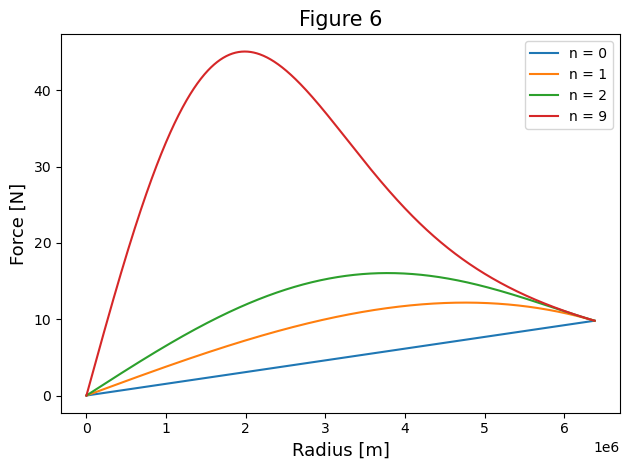

In [29]:
# Problem 2


# define the intagrand of density times dV
# M = 4*pi * p_n * integral_n (p_n doesn't depend on r, so it can be factored out of the integral)
#p_n = M/(4*pi * integral_n)
def Integrand(r, n):
    return ((1 - (r**2)/(R**2))**n) * r**2

# solve the integrals for different values of n
integral_0 = quad(Integrand, 0, R, args =(0))[0]
integral_1 = quad(Integrand, 0, R, args =(1))[0]
integral_2 = quad(Integrand, 0, R, args =(2))[0]
integral_9 = quad(Integrand, 0, R, args =(9))[0]

# density constants for different values of n
p_0 = M/(4 * np.pi * integral_0)
p_1 = M/(4 * np.pi * integral_1)
p_2 = M/(4 * np.pi * integral_2)
p_9 = M/(4 * np.pi * integral_9)

print('The density constants for n = 0, 1, 2, and 9, are', p_0, p_1, p_2, p_9, 'kg/m^3 respectively')

# define force functions for each value of n
# Force due to gravity = GmM/r^2, where m is the mass of the object (1 kg) and M 
# is the mass of the earth under the object at a corresponding to the radius
def force0(r):
    return (G * p_0 * 4 * np.pi * quad(Integrand, 0, r, args =(0))[0])/(r**2)

def force1(r):
    return (G * p_1 * 4 * np.pi * quad(Integrand, 0, r, args =(1))[0])/(r**2)

def force2(r):
    return (G * p_2 * 4 * np.pi * quad(Integrand, 0, r, args =(2))[0])/(r**2)

def force9(r):
    return (G * p_9 * 4 * np.pi * quad(Integrand, 0, r, args =(9))[0])/(r**2)

# define a vectorizable force function for each value of n
Force0 = np.vectorize(force0)
Force1 = np.vectorize(force1)
Force2 = np.vectorize(force2)
Force9 = np.vectorize(force9)

# define an array of radii values to evaluate at
rs2 = np.linspace(0.0000001, R, 1000)

# Evaluate the force with different values of n
F0 = Force0(rs2)
F1 = Force1(rs2)
F2 = Force2(rs2)
F9 = Force9(rs2)

# Graph
fig6, ax6 = plt.subplots()
ax6.plot(rs2, F0, '-', label = 'n = 0')
ax6.plot(rs2, F1, '-', label = 'n = 1')
ax6.plot(rs2, F2, '-', label = 'n = 2')
ax6.plot(rs2, F9, '-', label = 'n = 9')
ax6.set_xlabel('Radius [m]', size = 13)
ax6.set_ylabel('Force [N]', size = 13)
ax6.set_title('Figure 6', size = 15)
ax6.legend()
fig6.tight_layout()

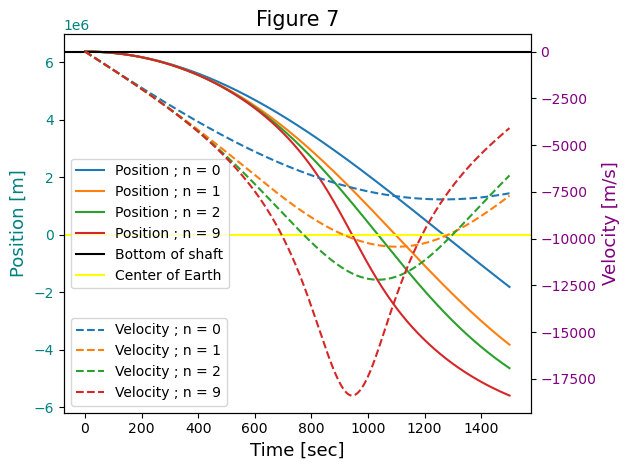

In [30]:
# problem 3 

# Define differential equations for each value of n for force and velocity
def dydt50(t, s):
    y, v = s
    dydt = v
    dvdt = -Force0(s[0]) 
    return [dydt, dvdt]

def dydt51(t, s):
    y, v = s
    dydt = v
    dvdt = -Force1(s[0]) 
    return [dydt, dvdt]

def dydt52(t, s):
    y, v = s
    dydt = v
    dvdt = -Force2(s[0]) 
    return [dydt, dvdt]

def dydt59(t, s):
    y, v = s
    dydt = v
    dvdt = -Force9(s[0]) 
    return [dydt, dvdt]

# constants 
R = 6378.1e3 # meters
positionf_53 = R - 4e3


# Time span 
t0_53 = 0 # seconds
tf_53 = 1500 # seconds
t_eval_53 = np.linspace(t0_53, tf_53, 1000)

# Initial conditions
position0_53 = R # m
velocity0_53 = 0 # m/s 
y0_53 = [position0_53, velocity0_53]

# solve for each value of n
soln_530 = solve_ivp(fun = dydt50, t_span = (t0_53, tf_53), y0 = y0_53, t_eval = t_eval_53)
soln_531 = solve_ivp(fun = dydt51, t_span = (t0_53, tf_53), y0 = y0_53, t_eval = t_eval_53)
soln_532 = solve_ivp(fun = dydt52, t_span = (t0_53, tf_53), y0 = y0_53, t_eval = t_eval_53)
soln_539 = solve_ivp(fun = dydt59, t_span = (t0_53, tf_53), y0 = y0_53, t_eval = t_eval_53)

# define the positions and velocities for different values of n
position_530 = soln_530.y[0]
velocity_530 = soln_530.y[1]

position_531 = soln_531.y[0]
velocity_531 = soln_531.y[1]

position_532 = soln_532.y[0]
velocity_532 = soln_532.y[1]

position_539 = soln_539.y[0]
velocity_539 = soln_539.y[1]

# graph
fig7, ax7 = plt.subplots()
ax7.plot(t_eval_53, position_530, '-', label = 'Position ; n = 0')
ax7.plot(t_eval_53, position_531, '-', label = 'Position ; n = 1')
ax7.plot(t_eval_53, position_532, '-', label = 'Position ; n = 2')
ax7.plot(t_eval_53, position_539, '-', label = 'Position ; n = 9')

ax77 = ax7.twinx()

ax77.plot(t_eval_53, velocity_530, '--', label = 'Velocity ; n = 0')
ax77.plot(t_eval_53, velocity_531, '--', label = 'Velocity ; n = 1')
ax77.plot(t_eval_53, velocity_532, '--', label = 'Velocity ; n = 2')
ax77.plot(t_eval_53, velocity_539, '--', label = 'Velocity ; n = 9')

ax7.axhline(positionf_53, 0, color = 'black', label = 'Bottom of shaft')
ax7.axhline(0, 0, color = 'yellow', label = 'Center of Earth')

ax7.set_xlabel('Time [sec]', size = 13)
ax7.set_ylabel('Position [m]', color = 'teal', size = 13)
ax77.set_ylabel('Velocity [m/s]', color = 'purple', size = 13)
ax7.tick_params(axis = 'y', labelcolor = 'teal')
ax77.tick_params(axis = 'y', labelcolor = 'purple')
ax7.legend(loc = 'center left')
ax77.legend(loc = 'lower left')
ax7.set_title('Figure 7', size = 15)
fig7.tight_layout()


In [31]:
# Problem 4

# define when the object reaches the center and the crossing time 
def Center5(t, s):
    return s[0]

def Crossing5(t, s):
    return s[0] - (0.99 * R)

# Set it so solve_ivp stops solving after the object reaches the center 
Center5.terminal = True

# solve for the different values of n for the center of the earth
soln_5300 = solve_ivp(fun = dydt50, t_span = (t0_53, tf_53), y0 = y0_53, t_eval = t_eval_53, events = Center5)
soln_5311 = solve_ivp(fun = dydt51, t_span = (t0_53, tf_53), y0 = y0_53, t_eval = t_eval_53, events = Center5)
soln_5322 = solve_ivp(fun = dydt52, t_span = (t0_53, tf_53), y0 = y0_53, t_eval = t_eval_53, events = Center5)
soln_5399 = solve_ivp(fun = dydt59, t_span = (t0_53, tf_53), y0 = y0_53, t_eval = t_eval_53, events = Center5)

# Time span for crossing time 
t0_533 = 0 # seconds
tf_533 =  5000 # seconds
t_eval_533 = np.linspace(t0_533, tf_533, 1000)

# solve for the different values of n for the crossing time
soln_53000 = solve_ivp(fun = dydt50, t_span = (t0_533, tf_533), y0 = y0_53, t_eval = t_eval_533, events = Crossing5, rtol = 1e-9)
soln_53111 = solve_ivp(fun = dydt51, t_span = (t0_533, tf_533), y0 = y0_53, t_eval = t_eval_533, events = Crossing5, rtol = 1e-9)
soln_53222 = solve_ivp(fun = dydt52, t_span = (t0_533, tf_533), y0 = y0_53, t_eval = t_eval_533, events = Crossing5, rtol = 1e-9)
soln_53999 = solve_ivp(fun = dydt59, t_span = (t0_533, tf_533), y0 = y0_53, t_eval = t_eval_533, events = Crossing5, rtol = 1e-9)

# Time when the object reaches the center for the different values of n
Center_time_50 = soln_5300.t_events[0][0]
Center_time_51 = soln_5311.t_events[0][0]
Center_time_52 = soln_5322.t_events[0][0]
Center_time_59 = soln_5399.t_events[0][0]

# Crossing time for differnt values of n
Crossing_time_500 = soln_53000.t_events[0][1]
Crossing_time_511 = soln_53111.t_events[0][1]
Crossing_time_522 = soln_53222.t_events[0][1]
Crossing_time_599 = soln_53999.t_events[0][1]


# Velocity of the object when it reaches the center for different values of n
Center_velocity_50 = soln_5300.y[1][-1]
Center_velocity_51 = soln_5311.y[1][-1]
Center_velocity_52 = soln_5322.y[1][-1]
Center_velocity_59 = soln_5399.y[1][-1]


print('For n = 0, the mass reaches the center of the earth at', Center_time_50, 'seconds')
print('For n = 1, the mass reaches the center of the earth at', Center_time_51, 'seconds')
print('For n = 2, the mass reaches the center of the earth at', Center_time_52, 'seconds')
print('For n = 9, the mass reaches the center of the earth at', Center_time_59, 'seconds')

print('For n = 0, when the mass reaches the center of the earth it is traveling at', Center_velocity_50, 'm/s')
print('For n = 1, when the mass reaches the center of the earth it is traveling at', Center_velocity_51, 'm/s')
print('For n = 2, when the mass reaches the center of the earth it is traveling at', Center_velocity_52, 'm/s')
print('For n = 9, when the mass reaches the center of the earth it is traveling at', Center_velocity_59, 'm/s')

print('For n = 0, the crossing time is', Crossing_time_500, 'seconds')
print('For n = 1, the crossing time is', Crossing_time_511, 'seconds')
print('For n = 2, the crossing time is', Crossing_time_522, 'seconds')
print('For n = 9, the crossing time is', Crossing_time_599, 'seconds')

For n = 0, the mass reaches the center of the earth at 1267.2409534601463 seconds
For n = 1, the mass reaches the center of the earth at 1096.8914820025395 seconds
For n = 2, the mass reaches the center of the earth at 1035.1387754254702 seconds
For n = 9, the mass reaches the center of the earth at 943.87480656016 seconds
For n = 0, when the mass reaches the center of the earth it is traveling at -7905.973703161439 m/s
For n = 1, when the mass reaches the center of the earth it is traveling at -10435.107354287697 m/s
For n = 2, when the mass reaches the center of the earth it is traveling at -12200.717986268062 m/s
For n = 9, when the mass reaches the center of the earth it is traveling at -18391.872010857638 m/s
For n = 0, the crossing time is 4955.1749655277945 seconds
For n = 1, the crossing time is 4272.1386362374415 seconds
For n = 2, the crossing time is 4026.392071646009 seconds
For n = 9, the crossing time is 3661.1996452538633 seconds


**Part 6**

In [33]:
# Question 1

# constants 
Mmoon = 7.35e22 # kg
Rmoon = 1738.1e3 # m

# solve for the gravity constant on the surface of the moon
gm = G * Mmoon / (Rmoon**2)

# Define a function for gravity on the moon with constant density and no drag
def gMoon(r):
    return np.where(r > 0, gm * (np.abs(r)/Rmoon), -gm * (np.abs(r)/Rmoon))

# Define a system of differential equations for force and velocity using the variable gravity on the moon
def dydt6(t, s):
    y, v = s
    dydt = v
    dvdt = -(gMoon(s[0]))
    return [dydt, dvdt]


# time span 
t0_61 = 0 # seconds
tf_61 = 60000 # seconds
t_eval_61 = np.linspace(t0_61, tf_61, 10000)

# intial conditions
position0_61 = Rmoon # m
velocity0_61 = 0 # m/s
y0_61 = [position0_61, velocity0_61]


# Define when the object reaches the center of the moon and its crossing time
def Center6(t, s):
    return s[0]

def Crossing6(t, s):
    return s[0] - (0.99 * Rmoon)
    
# solve for the center 
soln_61 = solve_ivp(fun = dydt6, t_span = (t0_61, tf_61), y0 = y0_61, t_eval = t_eval_61, events = Center6)

# solve for the crossing time
soln_611 = solve_ivp(fun = dydt6, t_span = (t0_61, tf_61), y0 = y0_61, t_eval = t_eval_61, events = Crossing6, rtol = 1e-9)

# Define the position, and velocity of the object and time the object reaches the center of the moon
position_61 = soln_61.y[0]
velocity_61 = soln_61.y[1]
center_time6 = soln_61.t_events[0][0]

# Crossing time
Crossing_time_611 = soln_611.t_events[0][1]

print('The mass will reach the center of the moon after', center_time6, 'seconds')
print('The crossing time for the moon is', Crossing_time_611, 'seconds')

The mass will reach the center of the moon after 1624.9059919736467 seconds
The crossing time for the moon is 6354.046331192721 seconds


In [34]:
# Problem 2

# density = total mass / total volume 
density_moon = Mmoon/((4/3) * np.pi * (Rmoon**3))

print('The density of the moon is', density_moon, 'kg/m^3')

The density of the moon is 3341.7538038703183 kg/m^3


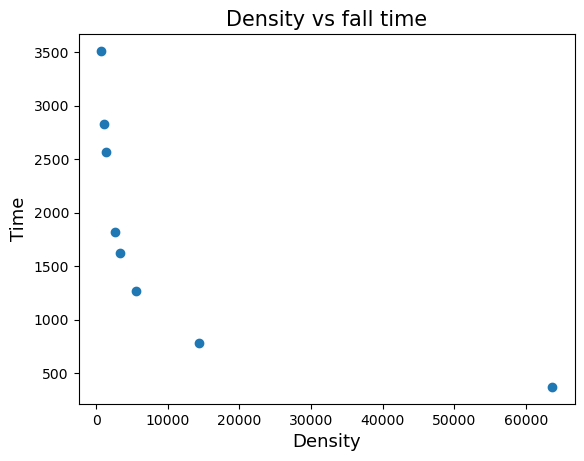

In [35]:
# problem 3


# density = M/((4/3) * pi * R^3) ; M/R^3 = density(3/(4 * pi)) ; g = GM/R^2 ; 
# Fg = -(GM/R^2)(r/R) = -GMr/R^3 = -Gr(density * 3/(4 * pi)) ; Fg = -(3/(4 * pi))Gr * (density)

# define a density function
def density(Mass, Radius):
    return Mass/((4/3) * np.pi * (Radius**3))

# create a test array of masses and radii to feed into the densities function
Mass = np.array([6e22, 9e23, 3e23, 7e23, 1e24, 3e24, Mmoon, M])
Radius = np.array([1000e3, 1500e3, 3000e3, 5000e3, 6000e3, 10000e3, Rmoon, R])

# creates an array of densites
densities = density(Mass, Radius)

# Define force functions for each density value 
def forces0(t, s):
    y, v = s
    dydt = v
    dvdt = -(4/3) * np.pi * G * s[0] * (densities[0])
    return [dydt, dvdt]

def forces1(t, s):
    y, v = s
    dydt = v
    dvdt = -(4/3) * np.pi * G * s[0] * (densities[1])
    return [dydt, dvdt]

def forces2(t, s):
    y, v = s
    dydt = v
    dvdt = -(4/3) * np.pi * G * s[0] * (densities[2])
    return [dydt, dvdt]

def forces3(t, s):
    y, v = s
    dydt = v
    dvdt = -(4/3) * np.pi * G * s[0] * (densities[3])
    return [dydt, dvdt]

def forces4(t, s):
    y, v = s
    dydt = v
    dvdt = -(4/3) * np.pi * G * s[0] * (densities[4])
    return [dydt, dvdt]

def forces5(t, s):
    y, v = s
    dydt = v
    dvdt = -(4/3) * np.pi * G * s[0] * (densities[5])
    return [dydt, dvdt]


# time span 
t0_63 = 0 # seconds
tf_63 = 50000 # seconds
t_eval_63 = np.linspace(t0_63, tf_63, 1000000)

# intial conditions
position0_630 = Radius[0]
velocity0_630 = 0
y0_630 = [position0_630, velocity0_630]

position0_631 = Radius[1]
velocity0_631 = 0
y0_631 = [position0_631, velocity0_631]

position0_632 = Radius[2]
velocity0_632 = 0
y0_632 = [position0_632, velocity0_632]

position0_633 = Radius[3]
velocity0_633 = 0
y0_633 = [position0_633, velocity0_633]

position0_634 = Radius[4]
velocity0_634 = 0
y0_634 = [position0_634, velocity0_634]

position0_635 = Radius[5]
velocity0_635 = 0
y0_635 = [position0_635, velocity0_635]


# Define when the object reaches the center

def Center63(t, s):
    return s[0]
    
# solve for each test density
soln_630 = solve_ivp(fun = forces0, t_span = (t0_63, tf_63), y0 = y0_630, t_eval = t_eval_63, events = Center63)
soln_631 = solve_ivp(fun = forces1, t_span = (t0_63, tf_63), y0 = y0_631, t_eval = t_eval_63, events = Center63)
soln_632 = solve_ivp(fun = forces2, t_span = (t0_63, tf_63), y0 = y0_632, t_eval = t_eval_63, events = Center63)
soln_633 = solve_ivp(fun = forces3, t_span = (t0_63, tf_63), y0 = y0_633, t_eval = t_eval_63, events = Center63)
soln_634 = solve_ivp(fun = forces4, t_span = (t0_63, tf_63), y0 = y0_634, t_eval = t_eval_63, events = Center63)
soln_635 = solve_ivp(fun = forces5, t_span = (t0_63, tf_63), y0 = y0_635, t_eval = t_eval_63, events = Center63)

# Times it takes the mass to reach the center of the object
center_time630 = soln_630.t_events[0][0]
center_time631 = soln_631.t_events[0][0]
center_time632 = soln_632.t_events[0][0]
center_time633 = soln_633.t_events[0][0]
center_time634 = soln_634.t_events[0][0]
center_time635 = soln_635.t_events[0][0]

# array of times it takes to reach the center of the object
times = np.array([center_time630, center_time631, center_time632, center_time633, center_time634, center_time635, center_time6, reaches_center42])

# graph
fig9, ax9 = plt.subplots()
ax9.plot(densities, times, 'o')
ax9.set_title('Density vs fall time', size = 15)
ax9.set_xlabel('Density', size = 13)
ax9.set_ylabel('Time', size = 13);

**Problem 3** The relationship between density and time seems to be one of exponential decay. The larger the density, the shorter the time it takes to reach the center of the object. But this isn't a linear relationship, rather it decays rather fast.